In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
md = pd.read_csv('movies_data.csv')
md = md.loc[:, ~md.columns.str.contains('^Unnamed')]
md.head()

,name,overview,tagline,certificate,runtime,genre,keywords,imdb_rate,metascore,director,stars,nvote,gross,release_date,countries,language,locations,company
0,Kẻ Đánh Cắp Giấc Mơ,A thief who steals corporate secrets through t...,Your mind is the scene of the crime,PG-13,148.0,"['Action', 'Adventure', 'Sci-Fi']","['dream', 'ambiguous ending', 'subconscious', ...",8.8,74.0,['Christopher Nolan'],"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",2342938,292.58,"July 16, 2010 (United States)","['United States', 'United Kingdom']","['English', 'Japanese', 'French']","['Fortress Mountain, Kananaskis Country, Alber...","['Warner Bros.', 'Legendary Entertainment', 'S..."
1,Hố Đen Tử Thần,A team of explorers travel through a wormhole ...,Mankind was born on Earth. It was never meant ...,C13,169.0,"['Adventure', 'Drama', 'Sci-Fi']","['astronaut', 'saving the world', 'space trave...",8.6,74.0,['Christopher Nolan'],"['Matthew McConaughey', 'Anne Hathaway', 'Jess...",1819025,188.02,"November 7, 2014 (United States)","['United States', 'United Kingdom', 'Canada']",['English'],['Iceland'],"['Paramount Pictures', 'Warner Bros.', 'Legend..."
2,Kỵ Sĩ Bóng Đêm Trỗi Dậy,Eight years after the Joker's reign of anarchy...,The Legend Ends,PG-13,164.0,"['Action', 'Drama']","['dc comics', 'batman character', 'bruce wayne...",8.4,78.0,['Christopher Nolan'],"['Christian Bale', 'Tom Hardy', 'Anne Hathaway...",1700671,448.14,"July 20, 2012 (United States)","['United States', 'United Kingdom']","['English', 'Arabic']","['Mehrangarh Fort, Jodhpur, Rajasthan, India']","['Warner Bros.', 'Legendary Entertainment', 'D..."
3,Hành Trình Django,"With the help of a German bounty-hunter, a fre...","Life, liberty and the pursuit of vengeance.",R,165.0,"['Drama', 'Western']","['racial vengeance', 'racial violence', 'slave...",8.4,81.0,['Quentin Tarantino'],"['Jamie Foxx', 'Christoph Waltz', 'Leonardo Di...",1548179,162.81,"December 25, 2012 (United States)",['United States'],"['English', 'German', 'French', 'Italian']","['Evergreen Plantation, 4677 Highway 18, Edgar...","['The Weinstein Company', 'Columbia Pictures']"
4,Sói Già Phố Wall,"Based on the true story of Jordan Belfort, fro...",Earn. Spend. Party.,R,180.0,"['Biography', 'Comedy', 'Crime']","['based on true story', 'stockbroker', 'female...",8.2,75.0,['Martin Scorsese'],"['Leonardo DiCaprio', 'Jonah Hill', 'Margot Ro...",1403561,116.90,"December 25, 2013 (United States)",['United States'],"['English', 'French']","['Portofino, Genoa, Liguria, Italy']","['Red Granite Pictures', 'Appian Way', 'Sikeli..."


In [3]:
md.shape

(1000, 18)

In [4]:
pd.DataFrame(pd.concat([md.dtypes, md.isnull().sum()], axis=1)).T.rename(index={0:'type', 1:'null values'})

,name,overview,tagline,certificate,runtime,genre,keywords,imdb_rate,metascore,director,stars,nvote,gross,release_date,countries,language,locations,company
type,object,object,object,object,float64,object,object,float64,float64,object,object,int64,float64,object,object,object,object,object
null values,0,0,72,33,0,0,0,0,510,0,0,0,94,0,0,0,0,0


**release_date** cần có kiểu dữ liệu là datetime

In [5]:
md['release_date']

0          July 16, 2010 (United States)
1       November 7, 2014 (United States)
2          July 20, 2012 (United States)
3      December 25, 2012 (United States)
4      December 25, 2013 (United States)
                     ...                
995         July 6, 2012 (United States)
996       March 31, 2010 (United States)
997      August 26, 2011 (United States)
998      August 23, 2013 (United States)
999       March 30, 2012 (United States)
Name: release_date, Length: 1000, dtype: object

In [6]:
def remove_bracket(test_str):
    ret = ''
    skip = 0
    for i in test_str:
        if i == '(':
            skip += 1
        elif i == ')'and skip > 0:
            skip -= 1
        elif skip == 0:
            ret += i
    return ret
md['release_date'] = md['release_date'].map(lambda x: remove_bracket(x))
md['release_date']

0          July 16, 2010 
1       November 7, 2014 
2          July 20, 2012 
3      December 25, 2012 
4      December 25, 2013 
              ...        
995         July 6, 2012 
996       March 31, 2010 
997      August 26, 2011 
998      August 23, 2013 
999       March 30, 2012 
Name: release_date, Length: 1000, dtype: object

In [7]:
md['release_date'] = pd.to_datetime(md['release_date'])

In [8]:
md['name'] = md['name'].astype('string')
md['overview'] = md['overview'].astype('string')
md['tagline'] = md['tagline'].astype('string')
md['certificate'] = md['certificate'].astype('string')

In [29]:
print('max: ',md['runtime'].max())
print('min: ',md['runtime'].min())
print('min: ',md['runtime'].mean())

max:  321.0
min:  80.0
min:  115.989


<AxesSubplot:>

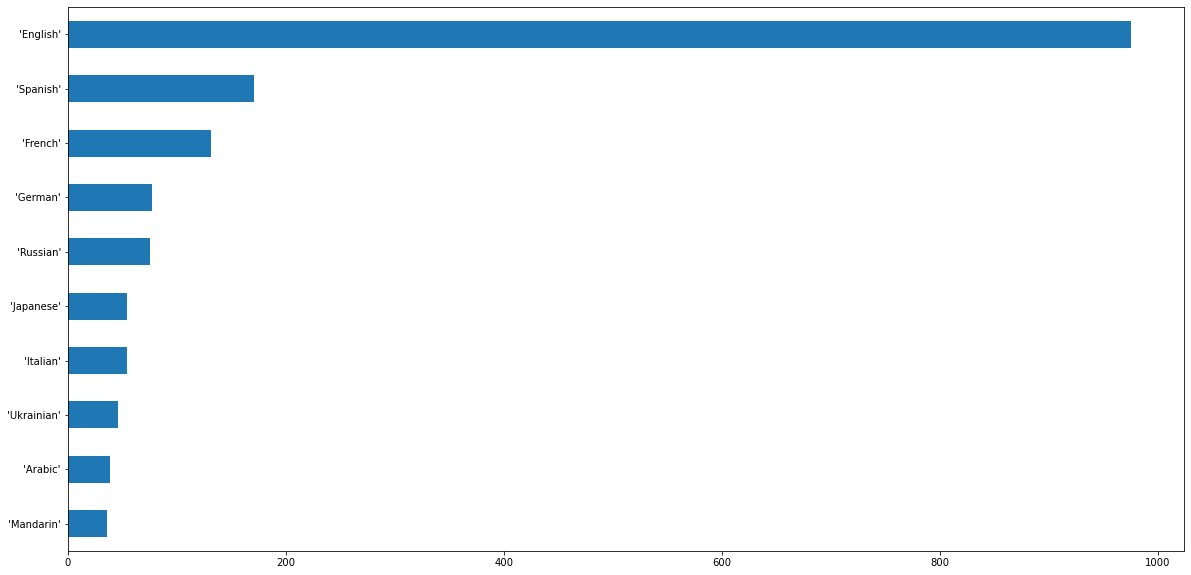

In [50]:
a = md['language'].apply(lambda x: x[1:-1].split(', ')).explode().value_counts().head(10)
a[::-1].plot.barh()

<AxesSubplot:>

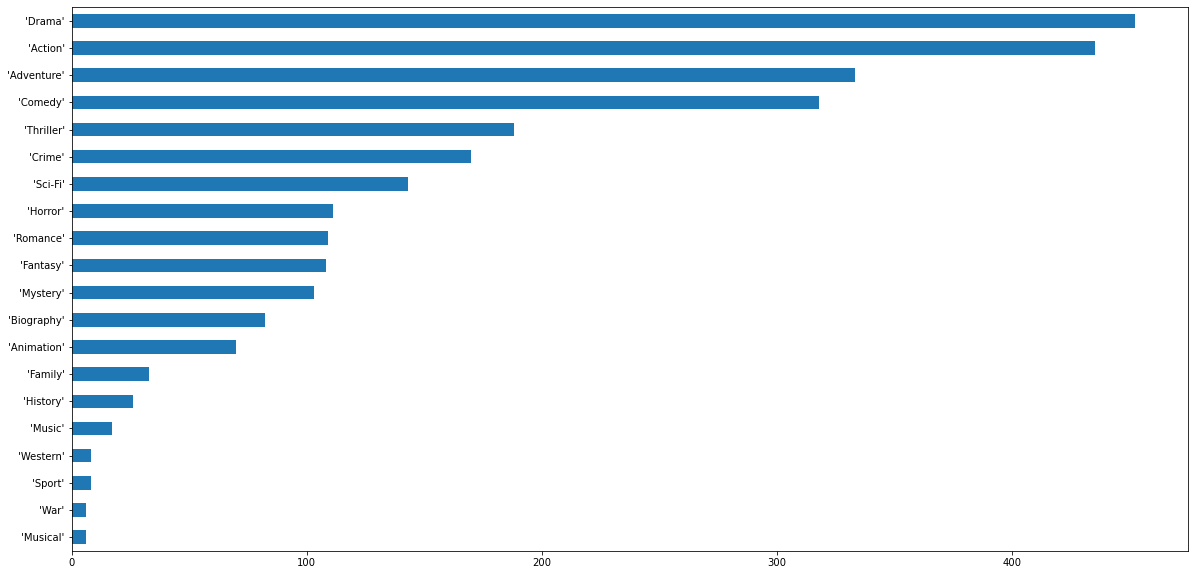

In [52]:
a = md['genre'].apply(lambda x: x[1:-1].split(', ')).explode().value_counts().head(20)
a[::-1].plot.barh()

In [64]:
a = md['keywords'].apply(lambda x: x[1:-1].split(', ')).explode().value_counts(sort=True).head(30)
a

'sequel'                          42
'superhero'                       38
'alien'                           30
'female protagonist'              25
'based on comic book'             21
'spy'                             19
'friendship'                      18
'survival'                        18
'dystopia'                        17
'based on true story'             17
'based on novel'                  17
'magic'                           16
'murder'                          16
'female nudity'                   16
'father daughter relationship'    16
'revenge'                         15
'violence'                        15
'neo noir'                        14
'vampire'                         14
'father son relationship'         14
'marvel cinematic universe'       14
'remake'                          13
'husband wife relationship'       13
'post apocalypse'                 13
'snow adventure'                  13
'assassin'                        13
'marvel comics'                   13
'